<a href="https://colab.research.google.com/github/fahammed2022/Classification-and-Regression/blob/main/Regression%20using%20scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 6619 - Deep Learning - Dr. Marques - Summer 2022

**Group Members:**

###Sandip Rijal
**Z-number: Z23709567**

###Fahad Ahammed
**Z-number: Z23685691**

###Jannatul Ferdous Shorna
**Z-number: Z23692384**

**Notebook URL:** https://colab.research.google.com/drive/1k5Fpv4ZWnv_Z_utWFuqRuX3V1ncJqZyZ?usp=sharing

# Project 3: Machine Learning
## STARTER CODE

### Goals

- To learn how to implement a Data Science / Machine Learning workflow in Python (using Pandas, Scikit-learn, Matplotlib, and Numpy)
- To learn how to use perform linear regression by least squares using Python and scikit-learn.
- To appreciate that the same linear regression coefficients may be the best fit for dramatically different data distributions -- as illustrated by the Anscombe's quartet.
- To practice with different types of regularization (*lasso* and *ridge*) and understand when to use them.
- To learn how to implement several different machine learning classification models in Python
- To learn how to evaluate and fine-tune the performance of a model using cross-validation
- To learn how to test a model and produce a set of plots and performance measures
- To expand upon the prior experience of manipulating, summarizing, and visualizing representative datasets  in data science and machine learning

### Instructions

- This assignment is structured in 3 parts, each using their own dataset(s).
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- **The number of points is indicated next to each part. They add up to 100.**
- **There are additional (10 points worth of) bonus items**, which are, of course optional.

### Important

- For the sake of reproducibility, use `random_state=0` (or equivalent) in all functions that use random number generation.
- It is OK to attempt the bonus points, but please **do not overdo it!**


---------
### Imports + Google Drive

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import scipy.stats as ss
from pandas_profiling import ProfileReport

from tensorflow import keras
from tensorflow.keras import layers

## Part 1: Regression Analysis


-----------
### 1a. Linear regression by least squares

In this part, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the *illiteracy* rate.

The Python code below plots the fertility versus illiteracy and computes the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

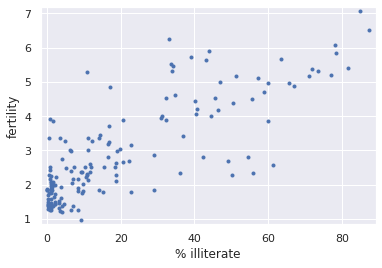

Pearson correlation coefficient between illiteracy and fertility: 0.80413


In [ ]:
df = pd.read_csv('https://github.com/ogemarques/data-files/raw/main/female_literacy_fertility.csv')
illiteracy = 100 - df['female literacy']
fertility = df['fertility']

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('% illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print('Pearson correlation coefficient between illiteracy and fertility: {:.5f}'.format(pearson_r(illiteracy, fertility)))

### 1.1 Your turn! (5 points)

We will assume that fertility is a linear function of the female illiteracy rate: `f=ai+b`, where `a` is the slope and `b` is the intercept.

We can think of the intercept as the minimal fertility rate, probably somewhere between one and two.

The slope tells us how the fertility rate varies with illiteracy.
We can find the best fit line .

Write code to plot the data and the best fit line (using `np.polyfit()`) and print out the slope and intercept.

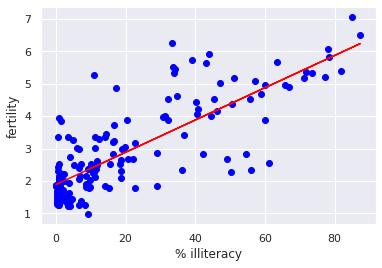

In [ ]:
# ENTER YOUR CODE HERE
# Fit a line to the data
slope, intercept = np.polyfit(illiteracy, fertility, 1)

# Plot the data and the fitted line
plt.scatter(illiteracy,fertility, color='blue')
plt.plot(illiteracy, slope*illiteracy + intercept, color='red')
plt.xlabel('% illiteracy')
plt.ylabel('fertility')
plt.show()

In [ ]:
# Print the results
print("Slope: ", slope)
print("Intercept: ", intercept)

Slope:  0.04979854809063423
Intercept:  1.8880506106365567


-------------------
### 1b. Anscombe's quartet

The Anscombe's quartet is a collection of four small data sets that have nearly identical simple descriptive statistics, yet have very different distributions. Each dataset consists of 11 `(x,y)` points. The quartet was created in 1973 by the statistician Francis Anscombe to demonstrate: the importance of visualization and exploratory data analysis (EDA), the effect of outliers and other influential observations on statistical properties, and the limitations of summary statistics (\*).

(\*) See https://heap.io/blog/data-stories/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story if you're interested.

The Python code below performs a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [ ]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

slope = 0.5000909090909094
intercept = 3.000090909090908


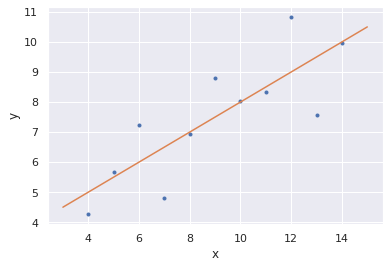

In [ ]:
# Perform linear regression: a, b
a, b = np.polyfit(x1, y1, 1)

# Print the slope and intercept
print('slope =', a)
print('intercept =', b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x1, y1, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

### 1.2 Your turn! (5 points)

### Linear regression on all Anscombe data

Write code to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, i.e. compute the slope and intercept for each set.

The data are stored in lists (`anscombe_x = [x1, x2, x3, x4]` and `anscombe_y = [y1, y2, y3, y4]`), corresponding to the $x$ and $y$ values for each Anscombe data set.

In [ ]:
anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

# ENTER YOUR CODE HERE
# Perform linear regression: a, b

for x, y in zip(anscombe_x, anscombe_y):
    x = np.array(x)
    y = np.array(y)
    slope, intercept = np.polyfit(x, y, 1)
    print("Intercept: {:.2f}, Slope: {:.2f}".format(intercept, slope))


Intercept: 3.00, Slope: 0.50
Intercept: 3.00, Slope: 0.50
Intercept: 3.00, Slope: 0.50
Intercept: 3.00, Slope: 0.50


-------------------
### 1c. Regression using scikit-learn

Now that we know the basics of linear regression, we will switch to scikit-learn, a powerful, workflow-oriented library for data science and machine learning.

The Python code below shows a simple linear regression example using scikit-learn. Note the use of the `fit()` and `predict()` methods.

[2.9776566]
-1.903310725531119


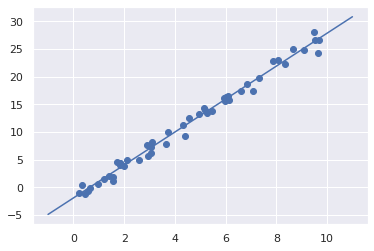

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data around the y = ax+b line where a=3 and b=-2
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 3 * x - 2 + rng.randn(50)

from sklearn.linear_model import LinearRegression

# Note: If you get a "ModuleNotFoundError: No module named 'sklearn'" error message, don't panic.
# It probably means you'll have to install the module by hand if you're using pip.
# If you're using conda, you should not see any error message.

model = LinearRegression(fit_intercept=True)

X = x[:, np.newaxis]
X.shape

model.fit(X, y)
print(model.coef_)
print(model.intercept_)

xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

### 1d. Polynomial regression

One way to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take the multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

The code below shows a simple example of polynomial regression using the ``PolynomialFeatures`` transformer in scikit-learn. Concretely, it shows how we can use polynomial features with a polynomial of degree seven, i.e. $$y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots + a_7 x^7$$

It also introduces the notion of a *pipeline* in scikit-learn. "The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters." (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

The R^2 score for the fit is:  0.9806993128749489


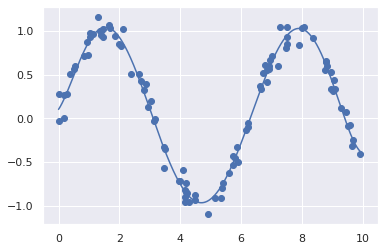

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)  # define range of x values to predict on
yfit = poly_model.predict(xfit[:, np.newaxis])


plt.scatter(x, y)
plt.plot(xfit, yfit);

print('The R^2 score for the fit is: ', poly_model.score(x[:, np.newaxis], y))

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

### 1.3 Your turn! (10 points)

Write code to find the best degree/order for the polynomial basis functions (between 1 and 15) by computing the quality of the fit using a suitable metric, in this case the $R^2$ coefficient (which can be computer using the `score()` function).

Remember that **the best possible score is 1.0**. The score can be negative (because the model can be arbitrarily worse). A score of 0 suggests a constant model that always predicts the expected value of y, disregarding the input features.

Hint: If you plot the score against the degree/order of the polynomial, you should see something like this:
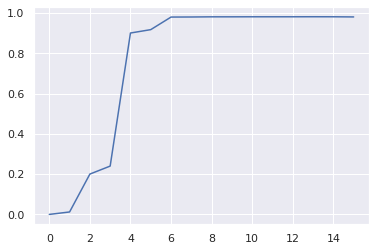


In [ ]:
# ENTER YOUR CODE HERE
from sklearn.metrics import r2_score


# Loop over degrees and fit polynomial regression models
degrees = range(1, 16)
r2_scores = {}
for degree in degrees:
    poly_model = make_pipeline(PolynomialFeatures(degree=degree),
                               LinearRegression())
    poly_model.fit(x[:, np.newaxis], y)
    y_pred = poly_model.predict(x[:, np.newaxis])
    r2_scores[degree] = r2_score(y[:, np.newaxis], y_pred)

# Print the R2 scores for each degree
print(r2_scores)

{1: 0.012172236970290573, 2: 0.20041267204540558, 3: 0.24010264456793462, 4: 0.9010949501596228, 5: 0.9178981253300202, 6: 0.980354677462121, 7: 0.9806993128749489, 8: 0.9815395575076697, 9: 0.98155568288277, 10: 0.981755432641064, 11: 0.9817593861427679, 12: 0.9817630669638746, 13: 0.9819417769979715, 14: 0.9817710571664016, 15: 0.9809977155351842}


In [ ]:
# Convert dictionary to two separate arrays
degrees_arr = np.array(list(r2_scores.keys()))
r2_scores_arr = np.array(list(r2_scores.values()))

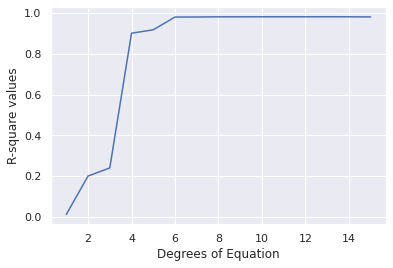

In [ ]:
#make graph
plt.plot(degrees_arr, r2_scores_arr)

# Label the axes
plt.xlabel('Degrees of Equation')
plt.ylabel('R-square values')

plt.show()


### 1e. Regularization

The use of polynomial regression with high-order polynomials can very quickly lead to over-fitting. In this part, we will look into the use of regularization to address potential overfitting.

The code below shows an attempt to fit a 15th degree polynomial to a sinusoidal shaped data. The fit is excellent ($R^2$ > 0.98), but might raise suspicions that it will lead to overfitting.

0.9809977155351842


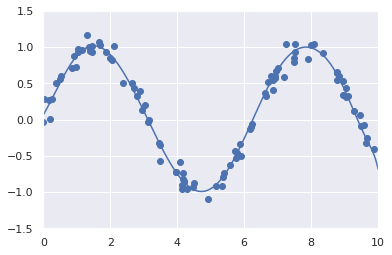

In [ ]:
model = make_pipeline(PolynomialFeatures(15),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = poly_model.score(x[:, np.newaxis], y)
print(score)

### 1.4 Your turn! (5 points)

Write Python code to perform Ridge regression ($L_2$ Regularization), plot the resulting fit, and compute the $R^2$ score.

Hints:
1. This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator.
2. In the beginning, use all default values for its parameters.
3. After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

In [ ]:
# ENTER YOUR CODE HERE
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create a pipeline for a polynomial Ridge Regression model
degree = 4 # degree of the polynomial features
alpha = 0.2 # regularization strength and change the parameter for highest score (R-square value)
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))

# Train the model on the training set
model.fit(x_train[:, np.newaxis], y_train)

# Evaluate the performance of the model on the test set
score = model.score(x_test[:, np.newaxis], y_test)

# Print the R-squared value of the model
print("R-squared value:", score)

R-squared value: 0.8847986181259452


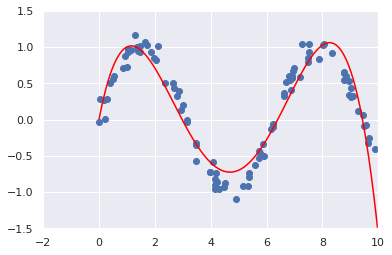

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]), color="red")

plt.xlim(-2, 10)
plt.ylim(-1.5, 1.5);

### 1.5 Your turn! (5 points)

Write Python code to perform Lasso regression ($L_1$ Regularization), plot the resulting fit, and compute the $R^2$ score.

Hints:
1. This type of penalized model is built into Scikit-Learn with the ``Lasso`` estimator.
2. In the beginning, use `Lasso(alpha=0.1, tol=0.2)`
3. After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# Create a pipeline for a polynomial Ridge Regression model
degree = 5 # degree of the polynomial features
alpha = 0.1 # regularization strength and change the parameter for highest score (R-square value)
model_ls = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))

# Train the model on the training set
model_ls.fit(x_train[:, np.newaxis], y_train)

# Evaluate the performance of the model on the test set
score = model_ls.score(x_test[:, np.newaxis], y_test)

# Print the R-squared value of the model
print("R-squared value:", score)

R-squared value: 0.6182983702216356


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.178e+00, tolerance: 2.966e-03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
y_pred = model.predict(x_test[:, np.newaxis])

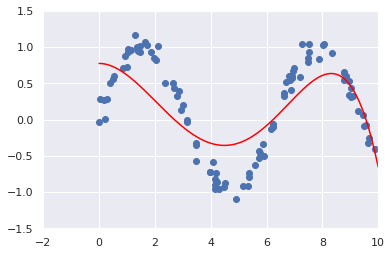

In [ ]:
# # Plot the resulting fit
# plt.scatter(x, y, label="true values")
# plt.scatter(x_test, y_pred, label="predicted values", color="red")
# plt.xlim(-2, 10.5)
# plt.ylim(-1.5, 1.5);


# Plot the resulting fit
plt.scatter(x, y)
plt.plot(xfit, model_ls.predict(xfit[:, np.newaxis]), color="red")

plt.xlim(-2, 10)
plt.ylim(-1.5, 1.5);

### 1f. The housing problem
The Boston housing dataset is a classic dataset used in linear regression examples.
(See https://scikit-learn.org/stable/datasets/index.html#boston-dataset for more)

The Python code below:
- Loads the Boston dataset (using scikit-learn's `load_boston()`) and converts it into a Pandas dataframe
- Selects two features to be used for fitting a model that will then be used to make predictions: LSTAT (% lower status of the population) and RM (average number of rooms per dwelling) (\*)
- Splits the data into train and test sets

(\*) See https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 for details.

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston['MEDV'] = boston_dataset.target
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


#### (OPTIONAL EDA)

The (innocent-looking) lines of code below use Pandas Profiling to produce rich reports, plots and insights on the dataset.

Read more about it:

*   https://pypi.org/project/pandas-profiling/
*   https://www.datacourses.com/pandas-1150/
*   https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html
*   https://medium.com/analytics-vidhya/pandas-profiling-5ecd0b977ecd  

In [ ]:
# fun with pandas_profiling
profile = ProfileReport(boston, title='Pandas Profiling Report for Boston Housing Dataset', explorative=True)

In [ ]:
profile.to_notebook_iframe()

### 1.6 Bonus! (10 points)

Write Python code to:

1. Fit a linear model to the data.
2. Compute and print the RMSE and $R^2$ score for both train and test datasets.
3. Fit a polynomial model (of degree 4) to the data.
4. Compute and print the RMSE and $R^2$ score for both train and test datasets.
5. Apply Ridge regression to the polynomial model.
4. Compute and print the RMSE and $R^2$ score for both train and test datasets.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Predict the values of y using the trained model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Compute R-squared
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Compute RMSE for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("R-squared for training set:", r2_train)
print("R-squared for test set:", r2_test)
print('RMSE for training set:', rmse_train)
print('RMSE for test set:', rmse_test)

R-squared for training set: 0.6300745149331701
R-squared for test set: 0.6628996975186952
RMSE for training set: 5.637129335071195
RMSE for test set: 5.137400784702911


In [ ]:
# Create polynomial features up to degree 4
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict the target variable for train and test set
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

# Compute RMSE and R-squared values for train set
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)

# Compute RMSE and R-squared values for test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)

print("Train set:")
print(f"RMSE: {rmse_train:.2f}")
print(f"R-squared: {r2_train:.2f}")
print()
print("Test set:")
print(f"RMSE: {rmse_test:.2f}")
print(f"R-squared: {r2_test:.2f}")

Train set:
RMSE: 4.28
R-squared: 0.79

Test set:
RMSE: 3.89
R-squared: 0.81


In [ ]:
# Import Ridge module
#from sklearn.linear_model import Ridge

# Create polynomial features up to degree 4
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit a Ridge regression model to the polynomial features
model = Ridge(alpha=0.1)
model.fit(X_poly_train, y_train)

# Predict the values of y using the trained model
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

# Compute RMSE for both train and test datasets
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# Compute R-squared for both train and test datasets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print the RMSE and R-squared scores for both train and test datasets
print("RMSE - Train: {:.4f}, Test: {:.4f}".format(rmse_train, rmse_test))
print("R2 - Train: {:.4f}, Test: {:.4f}".format(r2_train, r2_test))

RMSE - Train: 4.4080, Test: 3.8922
R2 - Train: 0.7738, Test: 0.8065


-------------------
## Part 2: Classification

### 2a. The Iris dataset

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each:
- sepal length in cm;
- sepal width in cm;
- petal length in cm; and
- petal width in cm.

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Histograms, pair plots and summary statistics

The code below:

1. Computes and displays relevant summary statistics for the whole dataset.
2. Displays the pair plots for all (4) attributes for all (3) categories / species / classes in the Iris dataset.

In [ ]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Display summary statistics for the whole dataset
iris.describe()

### 2.1 Your turn! (15 points)
Write code to:

1. Build a decision tree classifier using scikit-learn's `DecisionTreeClassifier` (using the default options). Check documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
2. Plot the resulting decision tree.
(Note: if `graphviz` gives you headaches, a text-based 'plot'-- using `export_text` -- should be OK.)
3. Perform k-fold cross-validation using k=3 and display the results.


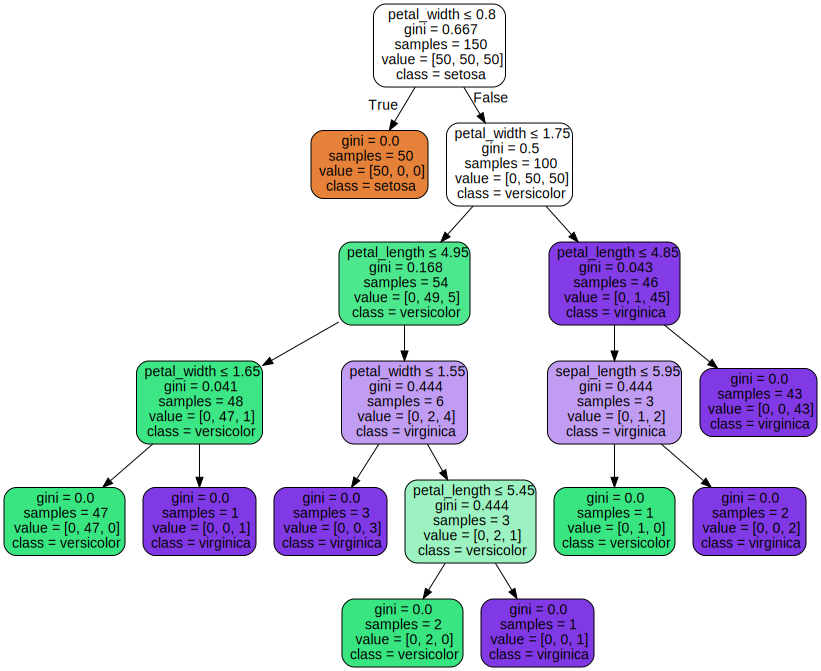

In [ ]:
# ENTER YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
# Load the Iris dataset
iris = sns.load_dataset("iris")

# Split the dataset into input features (X) and target labels (y) for Pandas dataframe
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]


#For numpy.array
#X = iris.iloc[:, :-1].values
#y = iris.iloc[:, -1].values

# Display the first few rows of the input features
#print(X.head(2))
#print(X.columns)

# Create a DecisionTreeClassifier object
tree_clf = DecisionTreeClassifier()

# Train the model on the data
tree_clf.fit(X, y)

from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
# Generate a Graphviz representation of the decision tree
dot_data = tree.export_graphviz(tree_clf, out_file=None,
                                feature_names=X.columns,
                                class_names=y.unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)

# Display the decision tree
graph

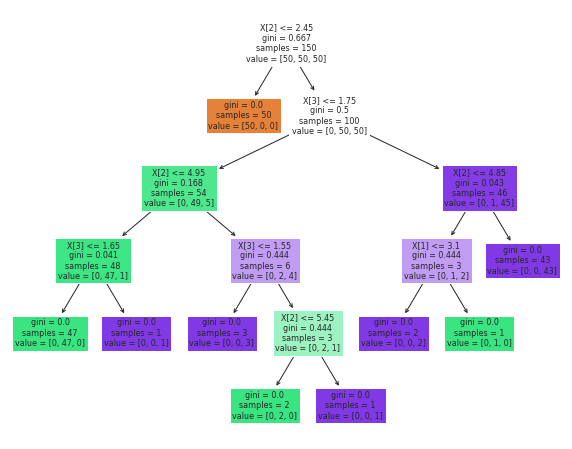

In [ ]:
#Other way for graph
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Create a decision tree classifier object
tree_clf = DecisionTreeClassifier()

# Perform 3-fold cross-validation and display the results
scores = cross_val_score(tree_clf, X, y, cv=3)
print("Cross-validation scores:", scores)
print("Average score:", np.mean(scores))

Cross-validation scores: [0.98 0.94 1.  ]
Average score: 0.9733333333333333


### 2b. Digit classification

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28$\times$28 pixels.

The Python code below loads the images from the MNIST dataset, flattens them, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [ ]:
from keras.datasets import mnist

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

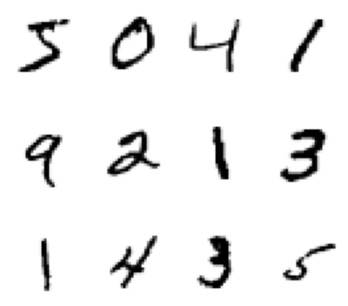

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

7

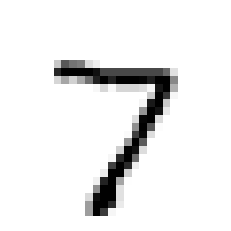

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### 2.2 Your turn! (10 points)

Write code to:

1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's `MultinomialNB()` with default options and using the raw pixel values as features.
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.

Hint: your accuracy will be around 83.5%

The Accuracy of the NB model is:  0.8357


The Confusion Matrix is:




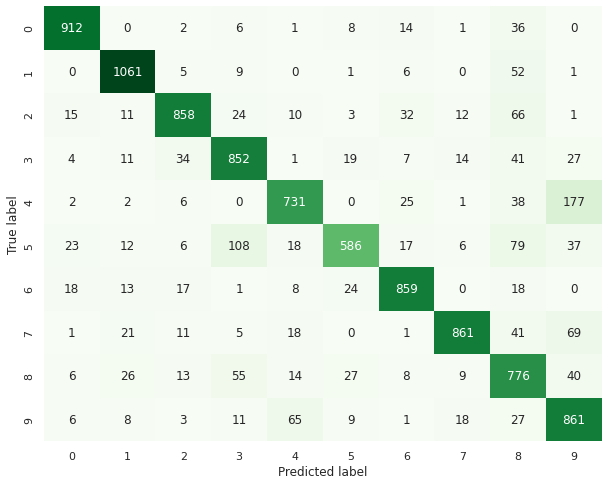

In [ ]:
# ENTER YOUR CODE HERE
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model = MultinomialNB()
model.fit(X_training, y_train)
y_pred= model.predict(X_validation)
acc_score = accuracy_score(y_valid, y_pred)
print("The Accuracy of the NB model is: ", acc_score)

my_confusion_matrix = confusion_matrix(y_valid, y_pred, )
print("\n")
print("The Confusion Matrix is:")
print("\n")

plt.figure(figsize=(10, 8))
sns.heatmap(my_confusion_matrix, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 2.3 Your turn! (10 points)

Write code to:

1. Build and fit a 10-class Random Forests classifier using scikit-learn's `RandomForestClassifier()` with default options (don't forget `random_state=0`) and using the raw pixel values as features.
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.

Hint: your accuracy should be > 90%

The Accuracy of the Random Forest model is:  0.9705


The Confusion Matrix is:




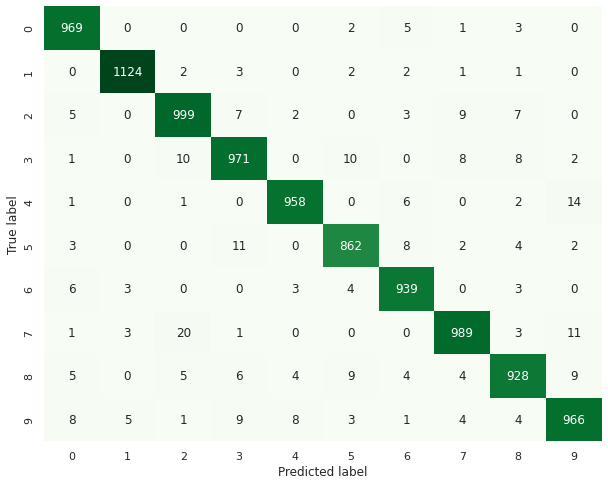

In [ ]:
# ENTER YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
model = RandomForestClassifier(random_state=0)
model.fit(X_training, y_train)
y_pred= model.predict(X_validation)
acc_score = model.score(X_validation, y_valid)
print("The Accuracy of the Random Forest model is: ", acc_score)

my_confusion_matrix = confusion_matrix(y_valid, y_pred, )
print("\n")
print("The Confusion Matrix is:")
print("\n")

plt.figure(figsize=(10, 8))
sns.heatmap(my_confusion_matrix, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 2.4 Your turn! (10 points)

Write code to:

1. Build and fit a 10-class classifier of your choice, with sensible initialization options, and using the raw pixel values as features.
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.

Hint: A variation of the Random Forests classifier from 2.2 above is acceptable. In that case, document your selection of (hyper)parameters and your rationale for choosing them.

The Accuracy of the Random Forest model is:  0.9716


The Confusion Matrix is:




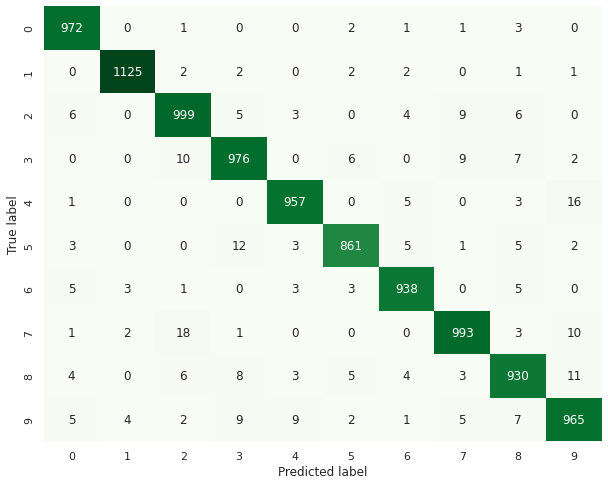

In [ ]:
# ENTER YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
model = RandomForestClassifier(n_estimators=500)
model.fit(X_training, y_train)
y_pred= model.predict(X_validation)
acc_score = model.score(X_validation, y_valid)
print("The Accuracy of the Random Forest model is: ", acc_score)

my_confusion_matrix = confusion_matrix(y_valid, y_pred, )
print("\n")
print("The Confusion Matrix is:")
print("\n")

plt.figure(figsize=(10, 8))
sns.heatmap(my_confusion_matrix, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

For this part, we have tuned the parameters of the Random Forest classifier. When we increased the tree size by using the parameter named n_estimators, we got a slightly better accuracy. When we set the **n_estimators = 500**(default value is 100), it increased the accuracy from **0.9705** to **0.9716**. We also tried tuning different parameters such as Random state and verbose. But it seems the default value achieved better accuracy than the changed value of those parameters. Changing the random state from "none" to 10, it decreased the accuracy at 0.968.

## Part 3: Face Recognition using PCA (eigenfaces)

In this part you will build a face recognition solution.

We will use a subset of the Labeled Faces in the Wild (LFW) people dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

The Python code below loads a dataset of 1867 images (resized to 62 $\times$ 47 pixels) from the dataset and displays some of them.

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
(1867, 62, 47)


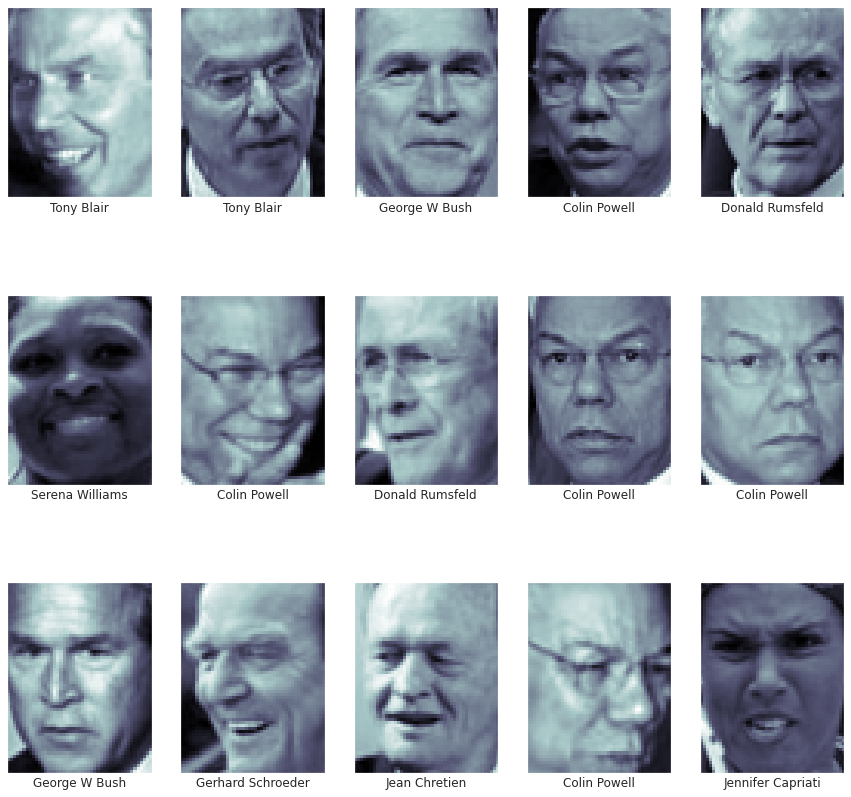

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,15
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

#### 3.1 Your turn! (15 points)

Write code to:

1. Use Principal Component Analysis (PCA) to reduce the dimensionality of each face to the first 120 components.
2. Build and fit a multi-class SVM classifier, with sensible initialization options, and using the PCA-reduced  features.
3. Make predictions on the test data, compute the precision, recall and f1 score for each category, compute the overall accuracy, and plot the resulting confusing matrix.
4. Display examples of correct and incorrect predictions (at least 5 of each).

In [ ]:
#Use Principal Component Analysis (PCA) to reduce the dimensionality of each face to the first 120 components.

import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



X = faces.data
y = faces.target


pca = PCA(n_components=120)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)




Original shape: (1867, 2914)
Reduced shape: (1867, 120)


In [ ]:
#Build and fit a multi-class SVM classifier, with sensible initialization options, and using the PCA-reduced features.

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

svm = SVC(C=1, kernel='rbf', gamma='scale', decision_function_shape='ovr')

svm.fit(X_train, y_train)



SVC(C=1)

In [ ]:
#Make predictions on the test data, compute the precision, recall and f1 score for each category, compute the overall accuracy, and plot the resulting confusing matrix.

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)



report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)




Accuracy: 0.5935828877005348
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.00      0.00      0.00        15
           2       0.69      0.78      0.73        78
           3       0.79      0.47      0.59        40
           4       0.48      0.96      0.64       157
           5       0.46      0.18      0.26        33
           6       1.00      0.80      0.89        15
           7       0.78      0.35      0.48        20
           8       0.00      0.00      0.00        13
           9       0.78      0.44      0.56        16
          10       0.50      0.09      0.15        11
          11       1.00      0.08      0.14        13
          12       0.94      0.62      0.75        24
          13       1.00      0.82      0.90        11
          14       1.00      0.15      0.27        13
          15       0.83      0.31      0.45        16
          16       0.73     

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


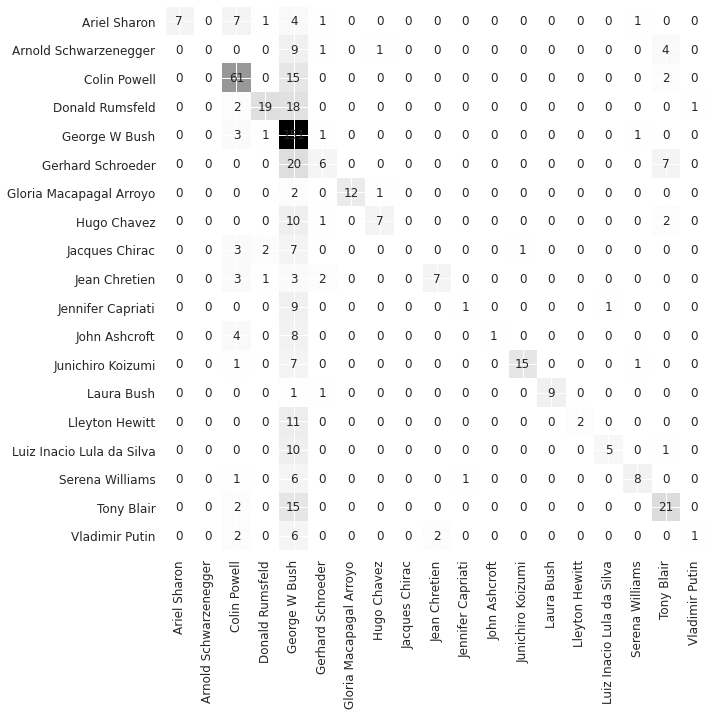

In [ ]:
# Plot the resulting confusion matrix
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mat, cmap='binary')

for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax.text(j, i, str(mat[i, j]), ha='center', va='center')

ax.set_xticks(range(len(faces.target_names)))
ax.set_xticklabels(faces.target_names, fontsize=12, rotation=90)
ax.set_yticks(range(len(faces.target_names)))
ax.set_yticklabels(faces.target_names, fontsize=12)

plt.show()


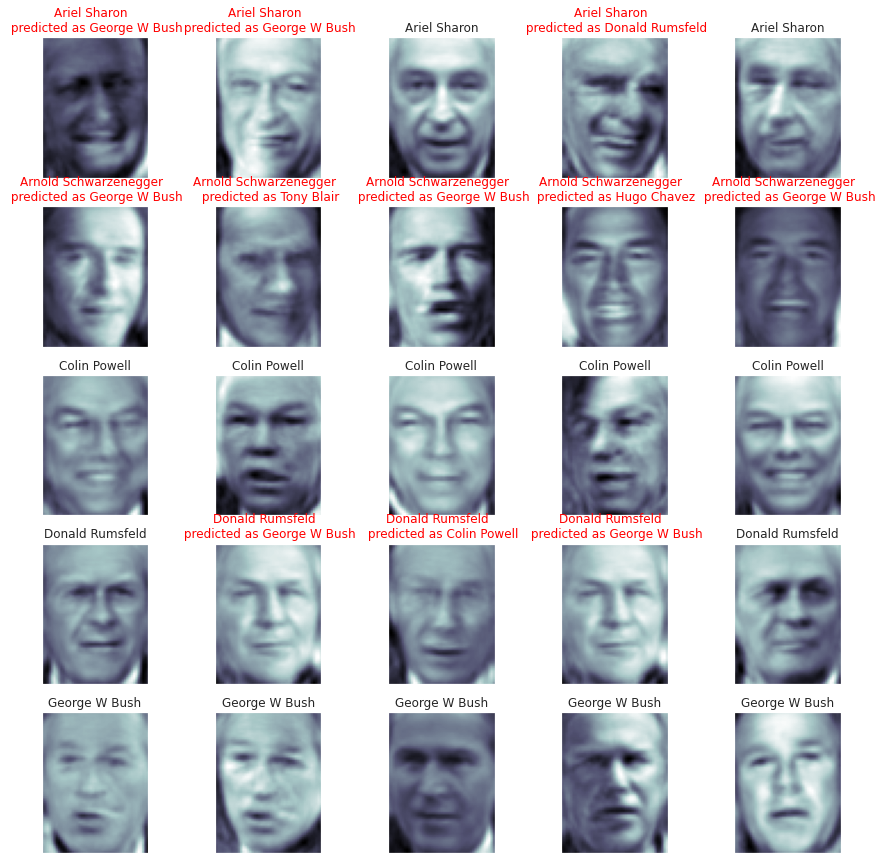

In [ ]:
# Display examples of correct and incorrect predictions
fig, ax = plt.subplots(5, 5, figsize=(15, 15))

for i in range(5):
    for j in range(5):
        idx = np.random.choice(np.where(y_test == i)[0])
        if y_pred[idx] == i:
            ax[i, j].imshow(pca.inverse_transform(X_test[idx]).reshape(62, 47), cmap='bone')
            ax[i, j].set_title(faces.target_names[i], fontsize=12)

        else:
            idx_incorrect = np.random.choice(np.where((y_test == i) & (y_pred != i))[0])
            ax[i, j].imshow(pca.inverse_transform(X_test[idx_incorrect]).reshape(62, 47), cmap='bone')
            ax[i, j].set_title(f"{faces.target_names[i]}  \n predicted as {faces.target_names[y_pred[idx_incorrect]]}", fontsize=12, color='Red')

        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

plt.show()


### Conclusions (10 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

**First of all, this is the first group project of this course. We consisted of a group of 3 members and all of us contributed equally. From this project we have learned how to use Data Science/ Machine Learning workflow in Python and how these libraries such as Pandas, Scikit-learn, Matplotlib, and Numpy work. We learned how to perform linear regression in different ways. Also some visualition tasks as well.**

**Working with the housing problems was fun, cause after completing the task we got to know that sklearn removed the dataset from the server. We tried to spend time on every problem but the face recognition part was time-consuming I believe.**

**If we could get enough time like a week, we would definitely try the CNN model for problem 2.4 where we simply built a Random forest model with custom parameters. In addition, different face recognition datasets can be used for more practice purposes.**